# Visualizing Data with Seaborn

"A picture is worth a thousand words."

An important element of data analysis and data presentation consists of making data visualizations. With [Seaborn](https://seaborn.pydata.org/), you can easily make simple, clear, and beautiful graphs. The only thing you need to do, is to present the data to Seaborn in a way it accepts. In general, Seaborn needs a pandas dataframe. We will make X different types of visualizations with data we extract from ancient texts.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from tf.app import use
A = use('etcbc/bhsa', hoist=globals())

This is Text-Fabric 9.3.2
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

122 features found and 0 ignored


In [3]:
query = """
word lex=MLKWT/|MMLKH/
"""

In [4]:
results = A.search(query)
A.table(results)

  0.22s 184 results


n,p,word
1,Numbers 24:7,מַלְכֻתֹֽו׃
2,Deuteronomy 3:21,מַּמְלָכֹ֔ות
3,Deuteronomy 28:25,מַמְלְכֹ֥ות
4,Joshua 10:2,מַּמְלָכָ֑ה
5,Joshua 11:10,מַּמְלָכֹ֥ות
6,1_Samuel 10:18,מַּמְלָכֹ֔ות
7,1_Samuel 20:31,מַלְכוּתֶ֑ךָ
8,1_Samuel 27:5,מַּמְלָכָ֖ה
9,1_Samuel 28:17,מַּמְלָכָה֙
10,2_Samuel 3:10,מַּמְלָכָ֖ה


In [5]:
results

[(85319,),
 (94994,),
 (108589,),
 (118404,),
 (119677,),
 (146638,),
 (154104,),
 (158329,),
 (158911,),
 (161877,),
 (177565,),
 (178397,),
 (179354,),
 (184803,),
 (185228,),
 (185251,),
 (185663,),
 (185739,),
 (186576,),
 (187818,),
 (190518,),
 (190533,),
 (202020,),
 (203708,),
 (204644,),
 (207732,),
 (207808,),
 (215673,),
 (216540,),
 (216760,),
 (217066,),
 (217745,),
 (218178,),
 (218180,),
 (219543,),
 (219653,),
 (224568,),
 (224645,),
 (228593,),
 (232815,),
 (235162,),
 (235252,),
 (240021,),
 (242276,),
 (243788,),
 (243825,),
 (246951,),
 (247569,),
 (248656,),
 (249264,),
 (249871,),
 (253161,),
 (253601,),
 (261637,),
 (261770,),
 (263081,),
 (263210,),
 (264675,),
 (272448,),
 (279129,),
 (279133,),
 (283681,),
 (296980,),
 (297422,),
 (297994,),
 (301955,),
 (303877,),
 (304948,),
 (304952,),
 (317956,),
 (318143,),
 (321577,),
 (324317,),
 (327948,),
 (328199,),
 (328692,),
 (333818,),
 (335334,),
 (335349,),
 (335350,),
 (335351,),
 (360804,),
 (364010,),
 (3654

In [6]:
result_nodes = [r[0] for r in results]

In [7]:
lexemes = [F.lex_utf8.v(w)[::-1] for w in result_nodes]

In [8]:
kingdom_dict = {'id': result_nodes, 
                'lexeme': lexemes}

kingdom_df = pd.DataFrame(kingdom_dict)
kingdom_df

,id,lexeme
0,85319,תוכלמ
1,94994,הכלממ
2,108589,הכלממ
3,118404,הכלממ
4,119677,הכלממ
...,...,...
179,424177,תוכלמ
180,425872,תוכלמ
181,426495,תוכלמ
182,426546,תוכלמ


In [9]:
sns.set(style="whitegrid",
         rc = {'figure.figsize':(12,8)})

## Boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html


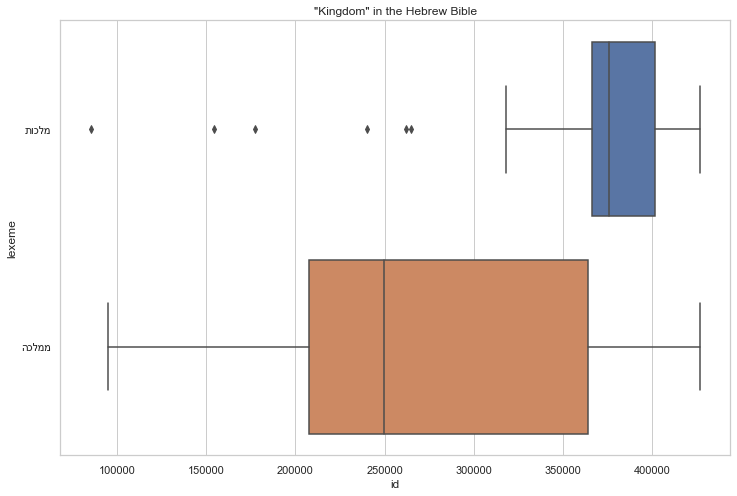

In [10]:
ax = sns.boxplot(x="id", 
                 y="lexeme", 
                 data=kingdom_df
                 ).set(title='"Kingdom" in the Hebrew Bible')

## Stripchart

https://seaborn.pydata.org/generated/seaborn.stripplot.html
https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

[Text(0.5, 1.0, '"Kingdom" in the Hebrew Bible')]

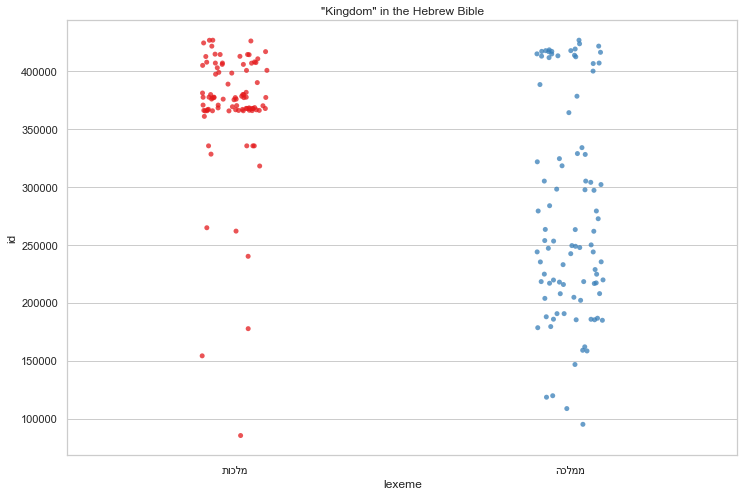

In [36]:
ax = sns.stripplot(y="id", 
                   x="lexeme", 
                   data=kingdom_df, 
                   palette="Set1", 
                   edgecolor="gray", 
                   alpha=.75, 
                   size=5
                   ).set(title='"Kingdom" in the Hebrew Bible')



## Barplot

We make a barplot with the lengths of the books of the Hebrew Bible. We measure the length of a book by counting the number of words.

In [26]:
book_names = []
book_lengths = []

for b in F.otype.s('book'):
    book_names.append(F.book.v(b))
    
    word_count = len(L.d(b, 'word'))
    book_lengths.append(word_count)

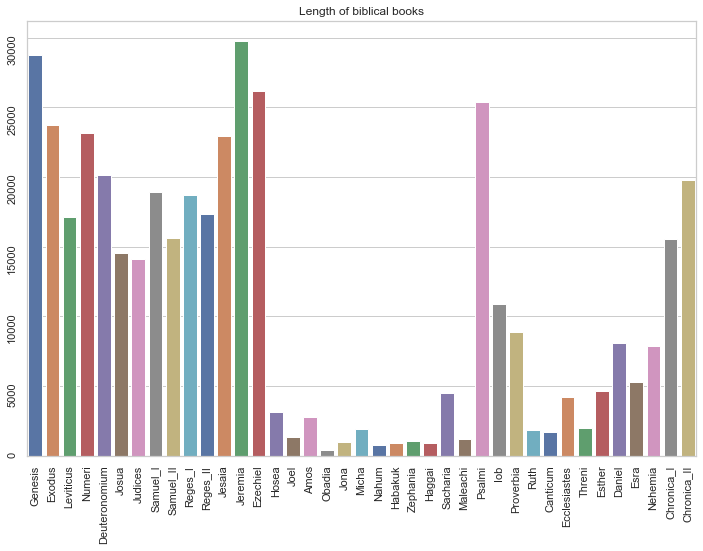

In [39]:
ax = sns.barplot(x=book_names, 
                 y=book_lengths, 
                 palette="deep"
                )

ax.set(title = 'Length of biblical books')
ax.tick_params(labelrotation=90)

plt.savefig('book_lengths.png')

## Heatmap with clustering

Which books have a similar use of parts of speech? We will investigate this by counting and plotting the different parts of speech in ech biblical book.

In [60]:
query = """
book
  word language=Hebrew
"""

In [92]:
results = A.search(query)

  1.33s 420484 results


In [69]:
books = []
pos = []

for result in results:
    bo, wo = result
    books.append(F.book.v(bo))
    pos.append(F.sp.v(wo))

In [73]:
pos_df = pd.DataFrame(zip(books, pos), columns=['book', 'pos'])

In [80]:
pos_counts_df = pos_df.groupby('book')['pos'].value_counts().unstack().fillna(0)

In [85]:
stand_df = pos_counts_df.div(pos_counts_df.sum(axis=1), axis=0)

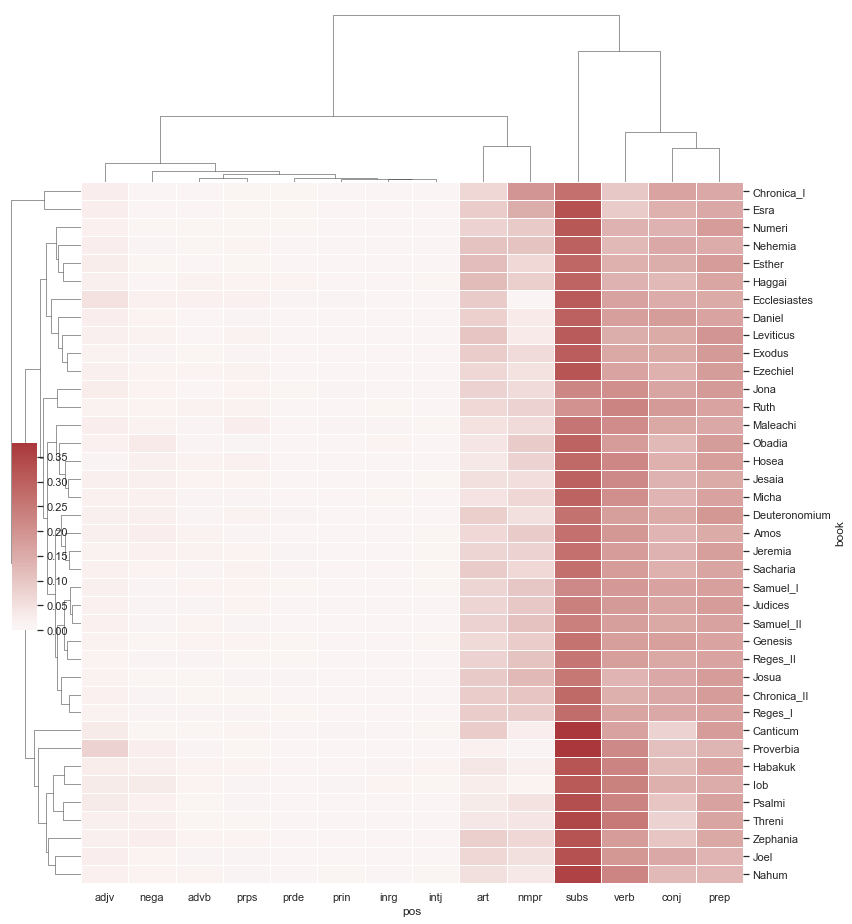

In [91]:
g = sns.clustermap(stand_df, center=0, cmap="vlag",
                   #row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))